#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [25]:
Clear = np.load("D:/Python/AICT/Data_/Clear.npy")
WIFI_FLOOD = np.load("D:/Python/AICT/Data_/WIFI_FLOOD.npy")
LTE_FLOOD = np.load("D:/Python/AICT/Data_/LTE_FLOOD.bin.npy")
WIFI_300PING = np.load("D:/Python/AICT/Data_/WIFI_PING300.npy")
LTE_300PING = np.load("D:/Python/AICT/Data_/LTE_PING300.npy")


In [32]:
pd.DataFrame(Clear)

,0
0,0.006348+0.004425j
1,0.006348+0.005676j
2,0.007904+0.006317j
3,0.008515+0.006562j
4,0.009980+0.006745j
...,...
4999995,0.000183+0.000092j
4999996,-0.000031+0.000183j
4999997,-0.000214+0.000122j
4999998,-0.000183-0.000244j


In [3]:
from Library.sinais import signal, concat_3
Wifi = (signal(data=WIFI_FLOOD,slice = 2000000, sinal = 'WIFI_FLOOD',id = 'WIFI_FLOOD'))
Wifi.info()
Wifi.to_pandas()
Wifi.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 1 columns):
 #   Column  Dtype    
---  ------  -----    
 0   0       complex64
dtypes: complex64(1)
memory usage: 15.3 MB
None


,WIFI_FLOOD_Real,WIFI_FLOOD_Imag,ID
0,0.000153,-0.000031,WIFI_FLOOD
1,0.000061,-0.000244,WIFI_FLOOD
2,0.000000,0.000000,WIFI_FLOOD
3,0.000183,0.000000,WIFI_FLOOD
4,0.000214,-0.000061,WIFI_FLOOD
...,...,...,...
1999995,0.000000,0.000092,WIFI_FLOOD
1999996,0.000061,0.000000,WIFI_FLOOD
1999997,0.000061,-0.000092,WIFI_FLOOD
1999998,-0.000122,0.000031,WIFI_FLOOD


In [4]:
CLEAR = (signal(data=Clear,slice = 2000000, sinal = 'Clear', id = 'Clear'))
CLEAR.info()
CLEAR.to_pandas()
CLEAR.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 1 columns):
 #   Column  Dtype    
---  ------  -----    
 0   0       complex64
dtypes: complex64(1)
memory usage: 15.3 MB
None


,Clear_Real,Clear_Imag,ID
0,0.004425,0.006348,Clear
1,0.005676,0.006348,Clear
2,0.006317,0.007904,Clear
3,0.006562,0.008515,Clear
4,0.006745,0.009980,Clear
...,...,...,...
1999995,0.000275,0.000000,Clear
1999996,-0.000275,0.000092,Clear
1999997,-0.000183,0.000061,Clear
1999998,0.000000,-0.000061,Clear


In [5]:
LTE = (signal(data=LTE_FLOOD,slice = 2000000, sinal = 'LTE_FLOOD', id='LTE_FLOOD'))
LTE.info()
LTE.to_pandas()
LTE.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 1 columns):
 #   Column  Dtype    
---  ------  -----    
 0   0       complex64
dtypes: complex64(1)
memory usage: 15.3 MB
None


,LTE_FLOOD_Real,LTE_FLOOD_Imag,ID
0,0.000244,0.000122,LTE_FLOOD
1,0.000153,-0.000153,LTE_FLOOD
2,-0.000153,-0.000153,LTE_FLOOD
3,0.000000,0.000336,LTE_FLOOD
4,0.000275,0.000305,LTE_FLOOD
...,...,...,...
1999995,0.000000,-0.000092,LTE_FLOOD
1999996,-0.000092,-0.000214,LTE_FLOOD
1999997,0.000122,-0.000122,LTE_FLOOD
1999998,0.000183,0.000092,LTE_FLOOD


In [11]:
uniao = concat_3(database1= CLEAR.database, database2=Wifi.database,database3=LTE.database ,sinal1 ='Clear',sinal2 = 'WIFI_FLOOD',sinal3 = 'LTE_FLOOD')
uniao.merge()
uniao.concat = uniao.concat.reset_index().rename(columns={'level_0':'Signals','level_1':'index'}).drop(columns=['index'])
df = uniao.concat
df.info()
df

Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 4 columns):
 #   Column   Dtype          
---  ------   -----          
 0   Signals  object         
 1   Real     float32        
 2   Imag     double[pyarrow]
 3   ID       object         
dtypes: double[pyarrow](1), float32(1), object(2)
memory usage: 160.2+ MB


,Signals,Real,Imag,ID
0,Clear,0.004425,0.006348,Clear
1,Clear,0.005676,0.006348,Clear
2,Clear,0.006317,0.007904,Clear
3,Clear,0.006562,0.008515,Clear
4,Clear,0.006745,0.009980,Clear
...,...,...,...,...
5999995,LTE_FLOOD,0.000000,-0.000092,LTE_FLOOD
5999996,LTE_FLOOD,-0.000092,-0.000214,LTE_FLOOD
5999997,LTE_FLOOD,0.000122,-0.000122,LTE_FLOOD
5999998,LTE_FLOOD,0.000183,0.000092,LTE_FLOOD


In [12]:
from Library.TrainTestSplit import TrainTestSplit 
spliter = TrainTestSplit(data = df)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.2, random_state=20)

print("x_train:", X_train)
print("y_train:", X_test)
print("x_test:", y_train)
print("y_test:", y_test)


x_train:              Real      Imag
2596790  0.000366 -0.000092
1431233  0.000031  0.000244
2386019 -0.000275 -0.000916
4690757 -0.000061  0.000061
4439311 -0.000153 -0.000458
...           ...       ...
3890076 -0.000183  0.000397
5528799 -0.000061 -0.000092
5280015 -0.000275 -0.000061
2976218 -0.000092  0.000397
1031523 -0.000275  0.000031

[4800000 rows x 2 columns]
y_train:              Real      Imag
2821133  0.000000 -0.000122
1455438 -0.000122 -0.000061
3288835  0.000366 -0.000061
2408147 -0.000122 -0.000580
2605658  0.000000 -0.000183
...           ...       ...
5884319 -0.000031  0.000092
2445814 -0.000275 -0.000305
2757744 -0.000031  0.000275
1639784  0.000275  0.000031
1395894 -0.000122  0.000122

[1200000 rows x 2 columns]
x_test: 2596790    WIFI_FLOOD
1431233         Clear
2386019    WIFI_FLOOD
4690757     LTE_FLOOD
4439311     LTE_FLOOD
              ...    
3890076    WIFI_FLOOD
5528799     LTE_FLOOD
5280015     LTE_FLOOD
2976218    WIFI_FLOOD
1031523         Clear
Name

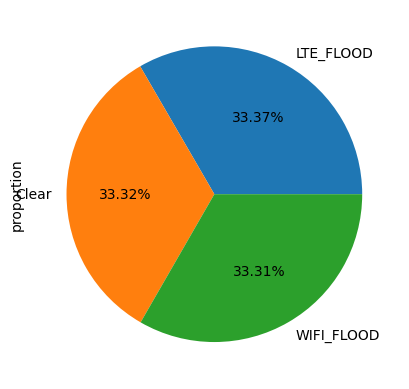

In [13]:
# Criando um objeto Visualization
from Library.Views import Visualization
vis = Visualization()

# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train

In [14]:
from Library.Normalizing import Normalizing
normalized = Normalizing(X_train=X_train, X_test= X_test)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.38961668 0.41850723]
 [0.38767587 0.41926884]
 [0.3954391  0.41926884]
 ...
 [0.38913148 0.42345772]
 [0.39398349 0.42041127]
 [0.38767587 0.42155369]]
normalized.X_train [[0.49999999 0.49681124]
 [0.49562797 0.5003189 ]
 [0.49165341 0.48820155]
 ...
 [0.49165341 0.49713012]
 [0.49403815 0.50191328]
 [0.49165341 0.49808675]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5,weights='distance', p=2)
knn_fit = knn.fit(normalized.X_train ,y_train)
model = knn_fit
model

KNeighborsClassifier(weights='distance')

In [16]:
from Library.metrics import metrics
metrics = metrics(model = knn.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()

,Score,Accuracy,F1-Score,Recall
0,0.336232,0.336232,0.174114,0.336232


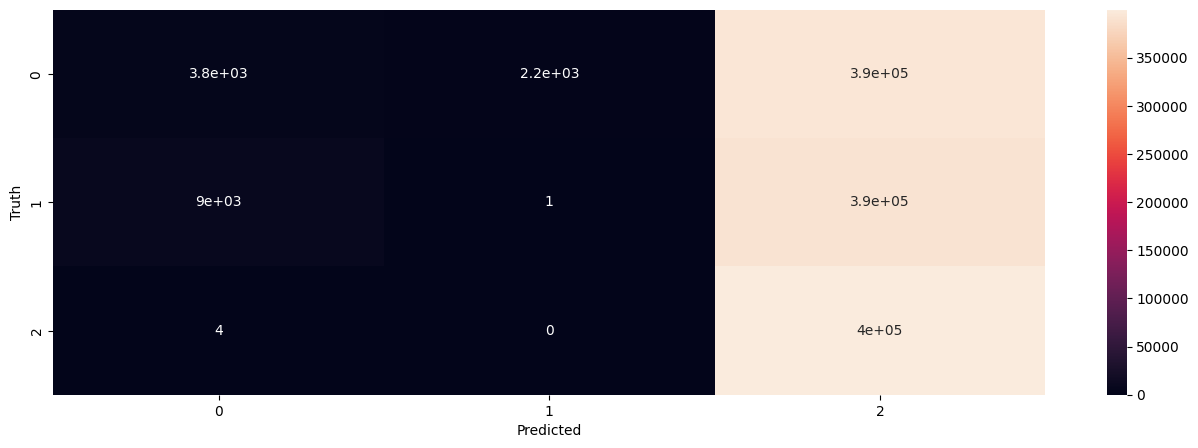

In [17]:
from Library.Views import Visualization ,RandomizedSearchCVWrapper
confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

In [18]:
metrics.confusion_matrix()

array([[  3762,   2233, 393895],
       [  9004,      1, 391386],
       [     4,      0, 399715]], dtype=int64)

In [19]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.29      0.01      0.02    399890
   LTE_FLOOD       0.00      0.00      0.00    400391
  WIFI_FLOOD       0.34      1.00      0.50    399719

    accuracy                           0.34   1200000
   macro avg       0.21      0.34      0.17   1200000
weighted avg       0.21      0.34      0.17   1200000



In [147]:

import category_encoders as ce
encoder = ce.ordinal.OrdinalEncoder()

parameters = {'n_neighbors': range(1,12,1),
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }
n_iter=8
cv=3
scoring='neg_mean_squared_error' 
random_state=20
return_train_score=True
n_jobs = -1
verbose = 0
knn = KNeighborsClassifier()

random_model = RandomizedSearchCVWrapper(model= knn, param_distributions =parameters , X_train = normalized.X_train, 
y_train= encoder.fit_transform(y_train), n_iter= n_iter, cv=cv,random_state=random_state,
return_train_score =return_train_score, scoring= scoring, n_jobs = n_jobs, verbose = verbose )


In [148]:
random_model.__dict__

{'model': KNeighborsClassifier(),
 'param_distributions': {'n_neighbors': range(1, 12),
  'weights': ['uniform', 'distance'],
  'p': [1, 2]},
 'n_iter': 8,
 'cv': 3,
 'random_state': 20,
 'n_jobs': -1,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0,
 'return_train_score': True,
 'randomsearch': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=8, n_jobs=-1,
                    param_distributions={'n_neighbors': range(1, 12),
                                         'p': [1, 2],
                                         'weights': ['uniform', 'distance']},
                    random_state=20, return_train_score=True,
                    scoring='neg_mean_squared_error'),
 'results':    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights   
 5       0.395246      0.088350         6.444125        0.671740       uniform  \
 3       0.287431      0.003242         4.751863        0.248359       uniform   
 6       0.334070      0.020703         5.8

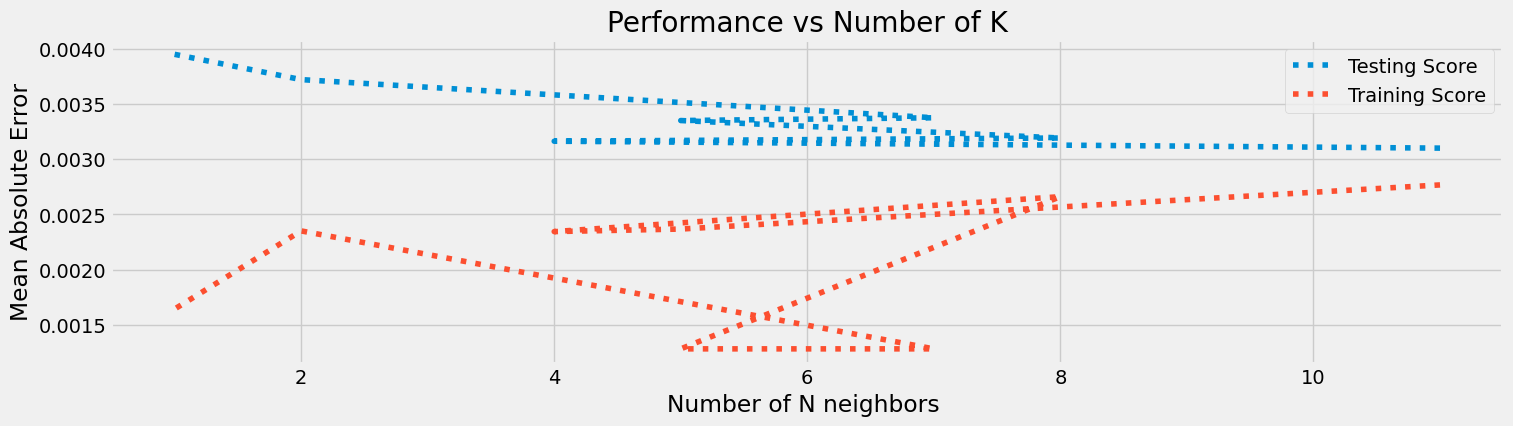

In [150]:
random_model.plot_mean_performance()

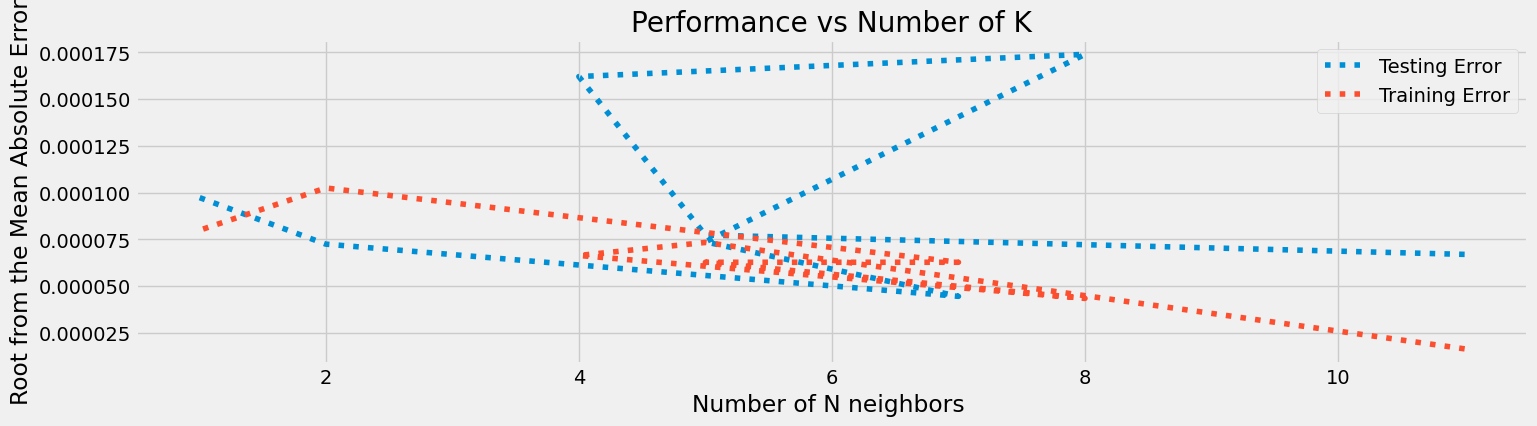

In [151]:
random_model.plot_std_performance()

In [172]:
random_model.results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,0.395246,0.088350,6.444125,0.671740,uniform,1,11,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 11}",-0.003087,-0.003187,-0.003025,-0.003100,0.000067,1,-0.002744,-0.002775,-0.002781,-0.002767,0.000016
3,0.287431,0.003242,4.751863,0.248359,uniform,2,5,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 5}",-0.003112,-0.003263,-0.003087,-0.003154,0.000077,2,-0.002469,-0.002300,-0.002331,-0.002367,0.000073
6,0.334070,0.020703,5.822894,0.555170,uniform,2,4,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 4}",-0.003087,-0.003387,-0.003012,-0.003162,0.000162,3,-0.002425,-0.002344,-0.002263,-0.002344,0.000066
0,0.411119,0.041635,4.542124,0.326540,uniform,2,8,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 8}",-0.003063,-0.003438,-0.003075,-0.003192,0.000174,4,-0.002713,-0.002606,-0.002662,-0.002660,0.000043
7,0.359908,0.038412,1.009443,0.020435,distance,1,5,"{'weights': 'distance', 'p': 1, 'n_neighbors': 5}",-0.003375,-0.003250,-0.003425,-0.003350,0.000074,5,-0.001313,-0.001194,-0.001337,-0.001281,0.000063


In [124]:
random_model.randomsearch

RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(n_neighbors=7,
                                                  weights='distance'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 8), 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=40, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [177]:
from Lib.metrics import metrics

metrics_random = metrics(model = random_model.randomsearch.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

In [179]:
metrics_random.report()

              precision    recall  f1-score   support

       Clear       0.55      1.00      0.71     20178
         LTE       0.30      0.00      0.00     19847
        Wifi       0.28      0.33      0.30     19975

    accuracy                           0.45     60000
   macro avg       0.38      0.44      0.34     60000
weighted avg       0.38      0.45      0.34     60000



In [181]:
metrics_random.confusion_matrix()

array([[20172,     2,     4],
       [ 2835,     3, 17009],
       [13375,     5,  6595]], dtype=int64)